Practice Phase project 3 of 1

This dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sklearn

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Tiwarim386/Glass_Identification/master/glass.csv')

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


This data related to the chemical properties of glass . In which it contain numerical data are present.Here Type is the Target variable which contain varitey of categories so it will be 'Classification problem',where we need to predict which is the best Type of Glass using classification models.

In [4]:
df.shape

(214, 10)

This dataset contain 214rows and 10 columns out of which 1 is target variable and remaining 9 are independent variables.

EDA(Exploratory Data Analysis)

To check the data types of the columns

In [5]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

To check the null values

In [7]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<Axes: >

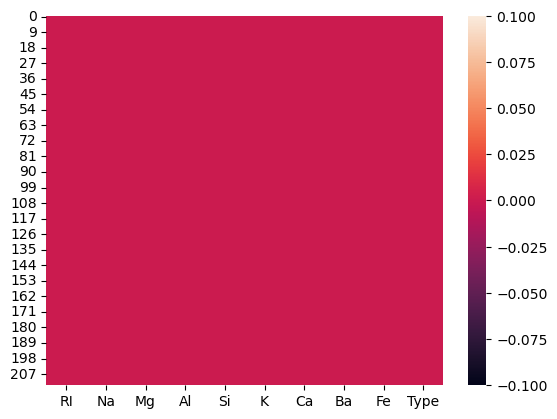

In [8]:
sns.heatmap(df.isnull())

As we can see above dataset there is no nan value/missing values present in dataset

Checking number of unique value in each columns.

In [9]:
df.nunique().to_frame('number of unique values')

,number of unique values
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32
Type,6


Description of dataset(it gives the statistical summary of numerical columns)

In [10]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


This gives the stastical information of the numerical columns.the summary of the above dataset looks perfect.since there is no negative /invalid values present. Here Mean is same as Median no skwness present in the dataset. As we can see 75th percentile and Max values are high so there is outliers present in the dataset.

In [11]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [12]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64


8.03    5
8.43    5
9.57    4
8.79    

In [13]:
df.nunique().to_frame('number of unique values')

,number of unique values
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32
Type,6


Data Visulization.

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


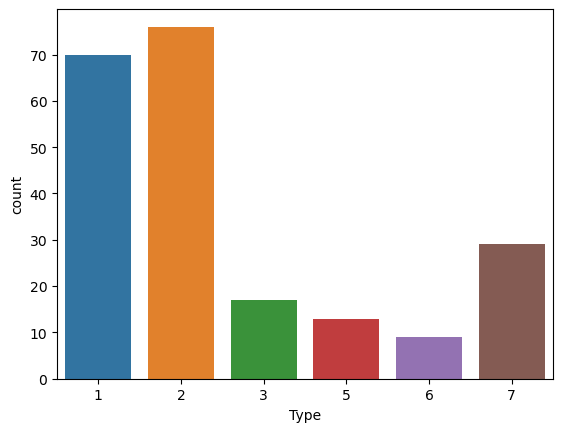

In [14]:
ux=sns.countplot(x='Type',data=df)
print(df['Type'].value_counts())
plt.show()

Here we can observe that there is 1,2 Type of glass is more and 3,5,6,7  less type present. so this leads to class imbalance issue in data.so here we are using oversampling method to resolve this problem later part.

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


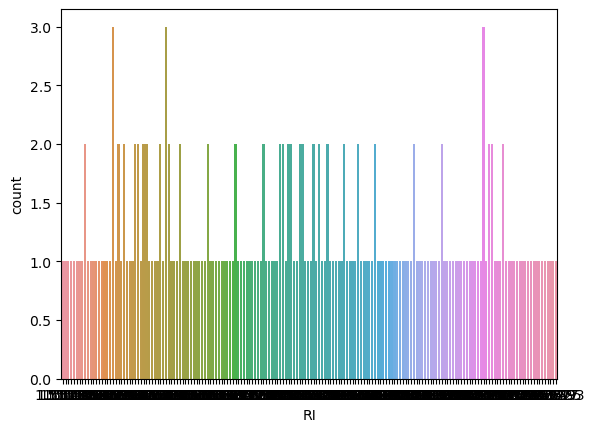

In [15]:
ux=sns.countplot(x='RI',data=df)
print(df['RI'].value_counts())
plt.show()

13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


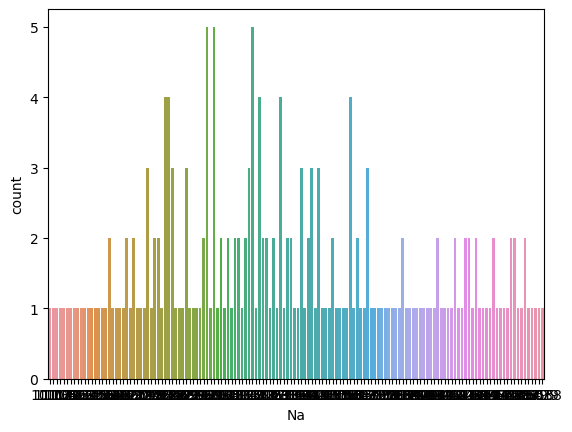

In [16]:
ux=sns.countplot(x='Na',data=df)
print(df['Na'].value_counts())
plt.show()

0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


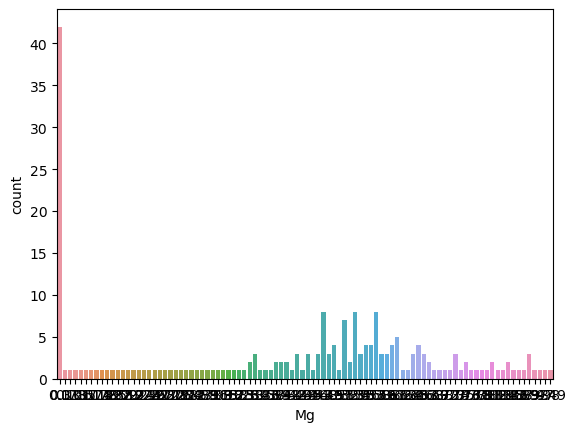

In [17]:
ux=sns.countplot(x='Mg',data=df)
print(df['Mg'].value_counts())
plt.show()

72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


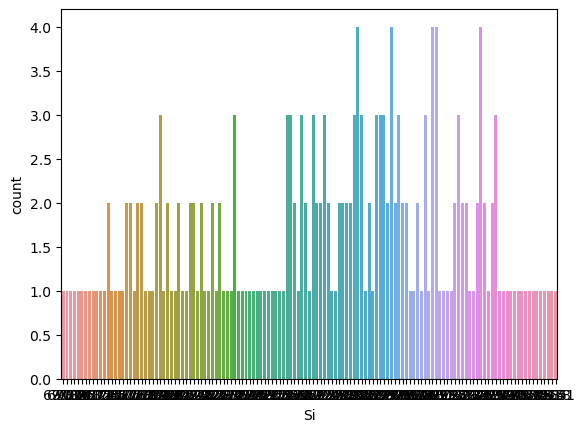

In [18]:
ux=sns.countplot(x='Si',data=df)
print(df['Si'].value_counts())
plt.show()

0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64


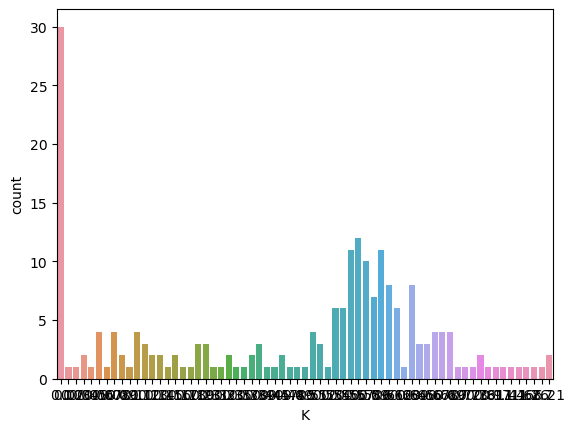

In [19]:
ux=sns.countplot(x='K',data=df)
print(df['K'].value_counts())
plt.show()

8.03    5
8.43    5
9.57    4
8.79    4
8.44    4
       ..
9.23    1
8.90    1
9.13    1
8.09    1
8.62    1
Name: Ca, Length: 143, dtype: int64


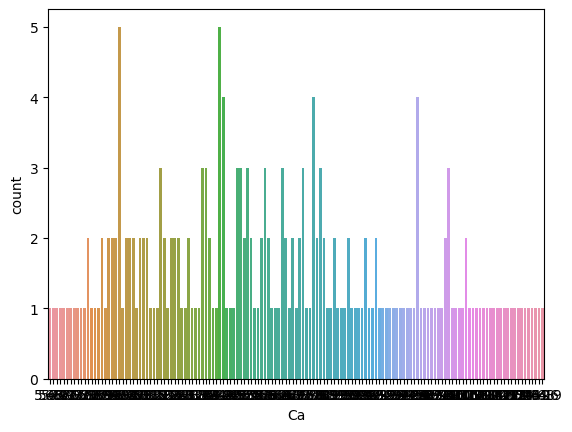

In [20]:
ux=sns.countplot(x='Ca',data=df)
print(df['Ca'].value_counts())
plt.show()

0.00    176
0.64      2
1.57      2
0.09      2
1.59      2
0.11      2
3.15      1
0.81      1
1.64      1
1.06      1
0.54      1
2.88      1
1.38      1
1.55      1
0.67      1
1.71      1
0.56      1
0.63      1
0.53      1
0.66      1
0.61      1
0.27      1
0.69      1
0.40      1
0.14      1
0.76      1
1.68      1
1.63      1
1.19      1
0.24      1
2.20      1
0.15      1
0.06      1
1.67      1
Name: Ba, dtype: int64


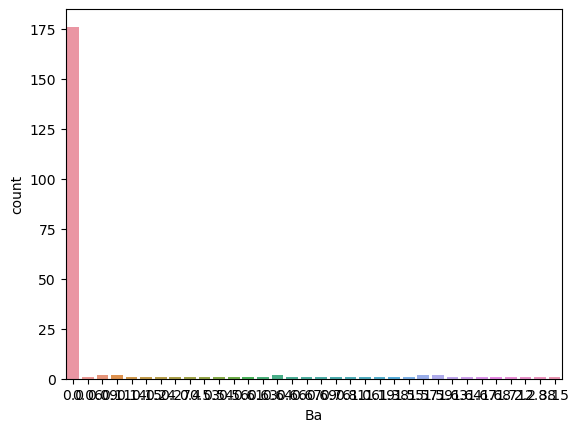

In [21]:
ux=sns.countplot(x='Ba',data=df)
print(df['Ba'].value_counts())
plt.show()

0.00    144
0.24      7
0.17      7
0.09      6
0.10      5
0.11      4
0.16      3
0.28      3
0.12      3
0.22      3
0.14      3
0.07      3
0.19      2
0.15      2
0.08      2
0.06      1
0.21      1
0.05      1
0.51      1
0.37      1
0.35      1
0.25      1
0.18      1
0.34      1
0.29      1
0.30      1
0.20      1
0.32      1
0.26      1
0.03      1
0.31      1
0.01      1
Name: Fe, dtype: int64


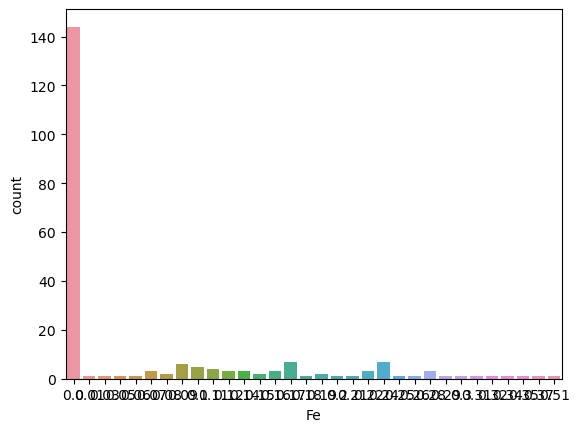

In [22]:
ux=sns.countplot(x='Fe',data=df)
print(df['Fe'].value_counts())
plt.show()

Multivariate Analysis --->here we consider more than 2 features to visualize the data.

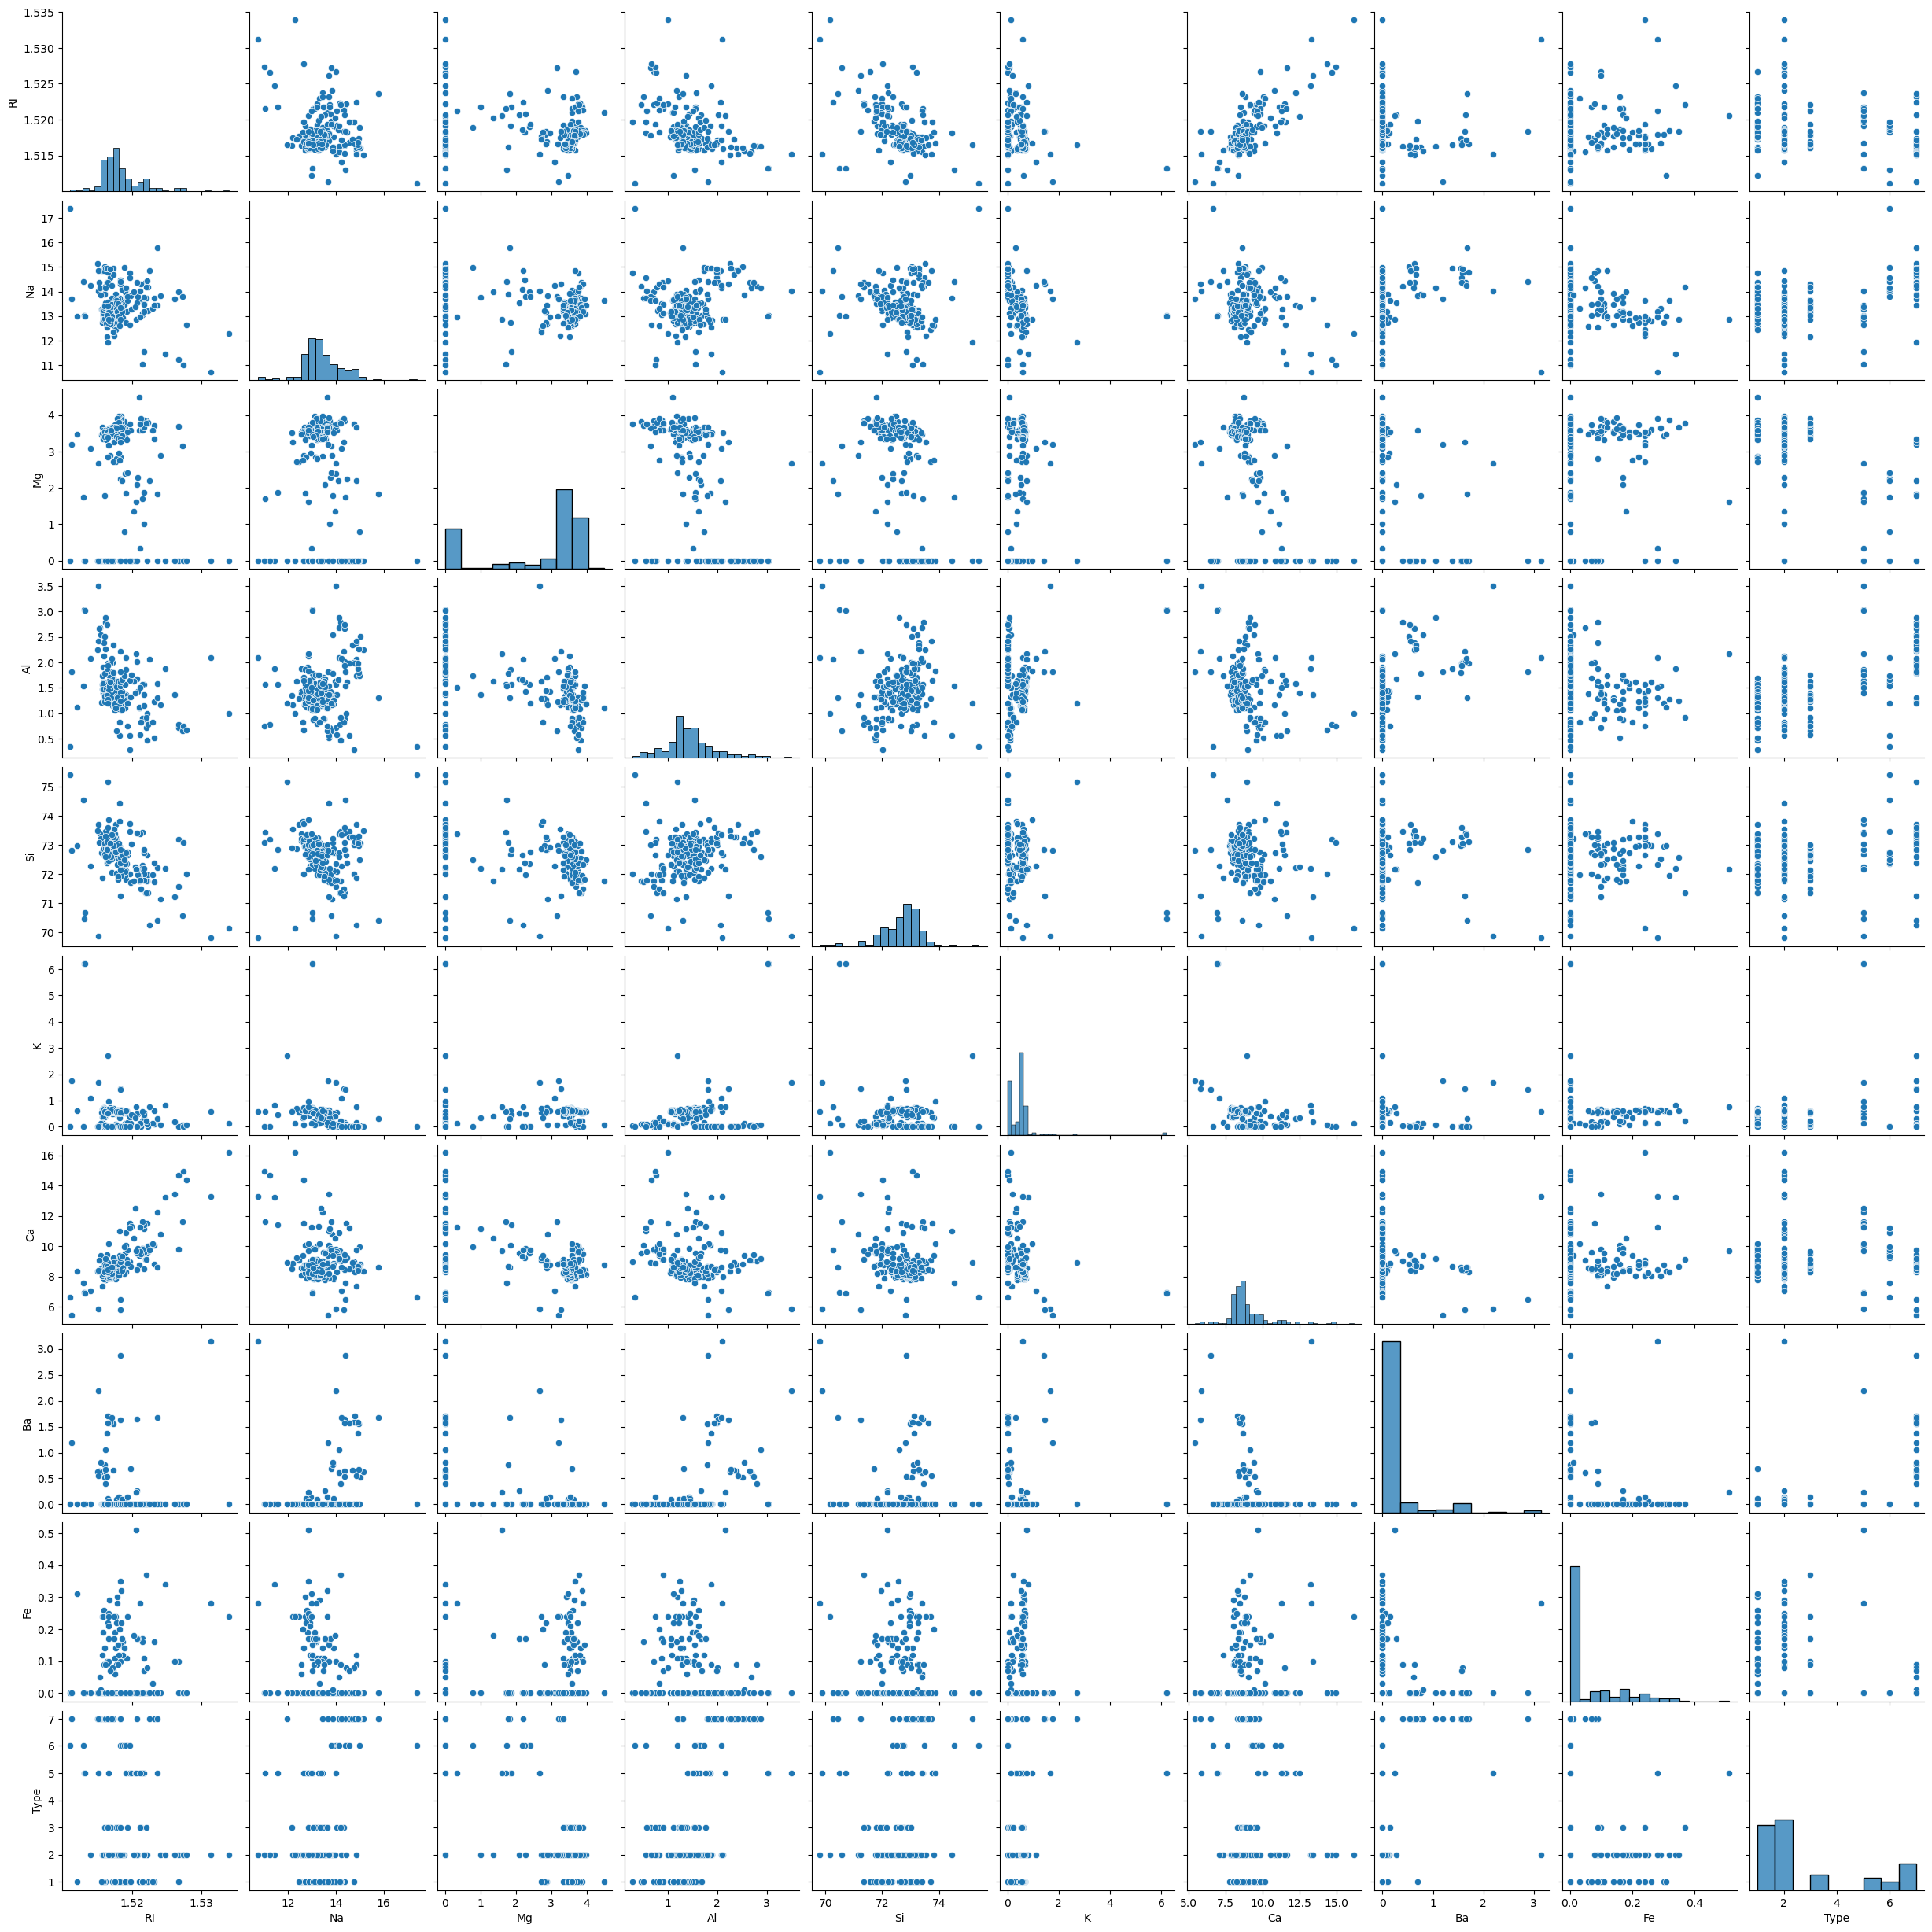

In [23]:
sns.pairplot(df)
plt.show()

Here we are checking outliers in the data.

RI         Axes(0.125,0.53;0.133621x0.35)
Na      Axes(0.285345,0.53;0.133621x0.35)
Mg       Axes(0.44569,0.53;0.133621x0.35)
Al      Axes(0.606034,0.53;0.133621x0.35)
Si      Axes(0.766379,0.53;0.133621x0.35)
K          Axes(0.125,0.11;0.133621x0.35)
Ca      Axes(0.285345,0.11;0.133621x0.35)
Ba       Axes(0.44569,0.11;0.133621x0.35)
Fe      Axes(0.606034,0.11;0.133621x0.35)
Type    Axes(0.766379,0.11;0.133621x0.35)
dtype: object

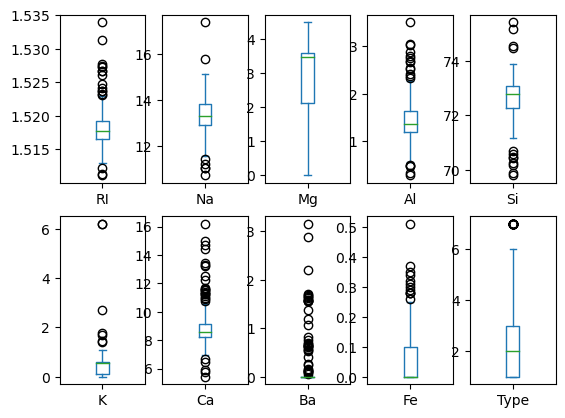

In [24]:
df.plot(kind='box',subplots=True,layout=(2,5))

As you see outliers are present to remove the outliers we use Zscore method to remove the outliers.

In [25]:
from scipy.stats import zscore
out_features=df[['RI','Na','Al','Si','K','Ca','Ba','Fe','Type']]
z=np.abs(zscore(out_features))
z

,RI,Na,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451,0.848275
1,0.249333,0.591817,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451,0.848275
2,0.721318,0.149933,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451,0.848275
3,0.232831,0.242853,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451,0.848275
4,0.312045,0.169205,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451,0.848275
...,...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451,2.010478
210,0.500178,1.856097,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451,2.010478
211,0.754046,1.168721,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451,2.010478
212,0.612399,1.193270,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451,2.010478


In [26]:
threshold=3
np.where(z>3)

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
        131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
        188, 189, 201, 201, 203, 207, 213], dtype=int64),
 array([5, 0, 1, 3, 5, 6, 0, 3, 5, 5, 5, 0, 5, 5, 7, 7, 2, 3, 6, 2, 4, 2,
        4, 7, 1, 3, 3, 6, 3, 4, 6, 6, 6], dtype=int64))

In [27]:
df1=df[(z<3).all(axis=1)]

In [28]:
df1.shape

(194, 10)

In [29]:
print('old dataframe:',df.shape[0])
print('new dataframe:',df1.shape[0])

old dataframe: 214
new dataframe: 194


In [30]:
print('datalosspercentage:',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

datalosspercentage: 9.345794392523365


In [31]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


Checking Skewness

In [32]:
df.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

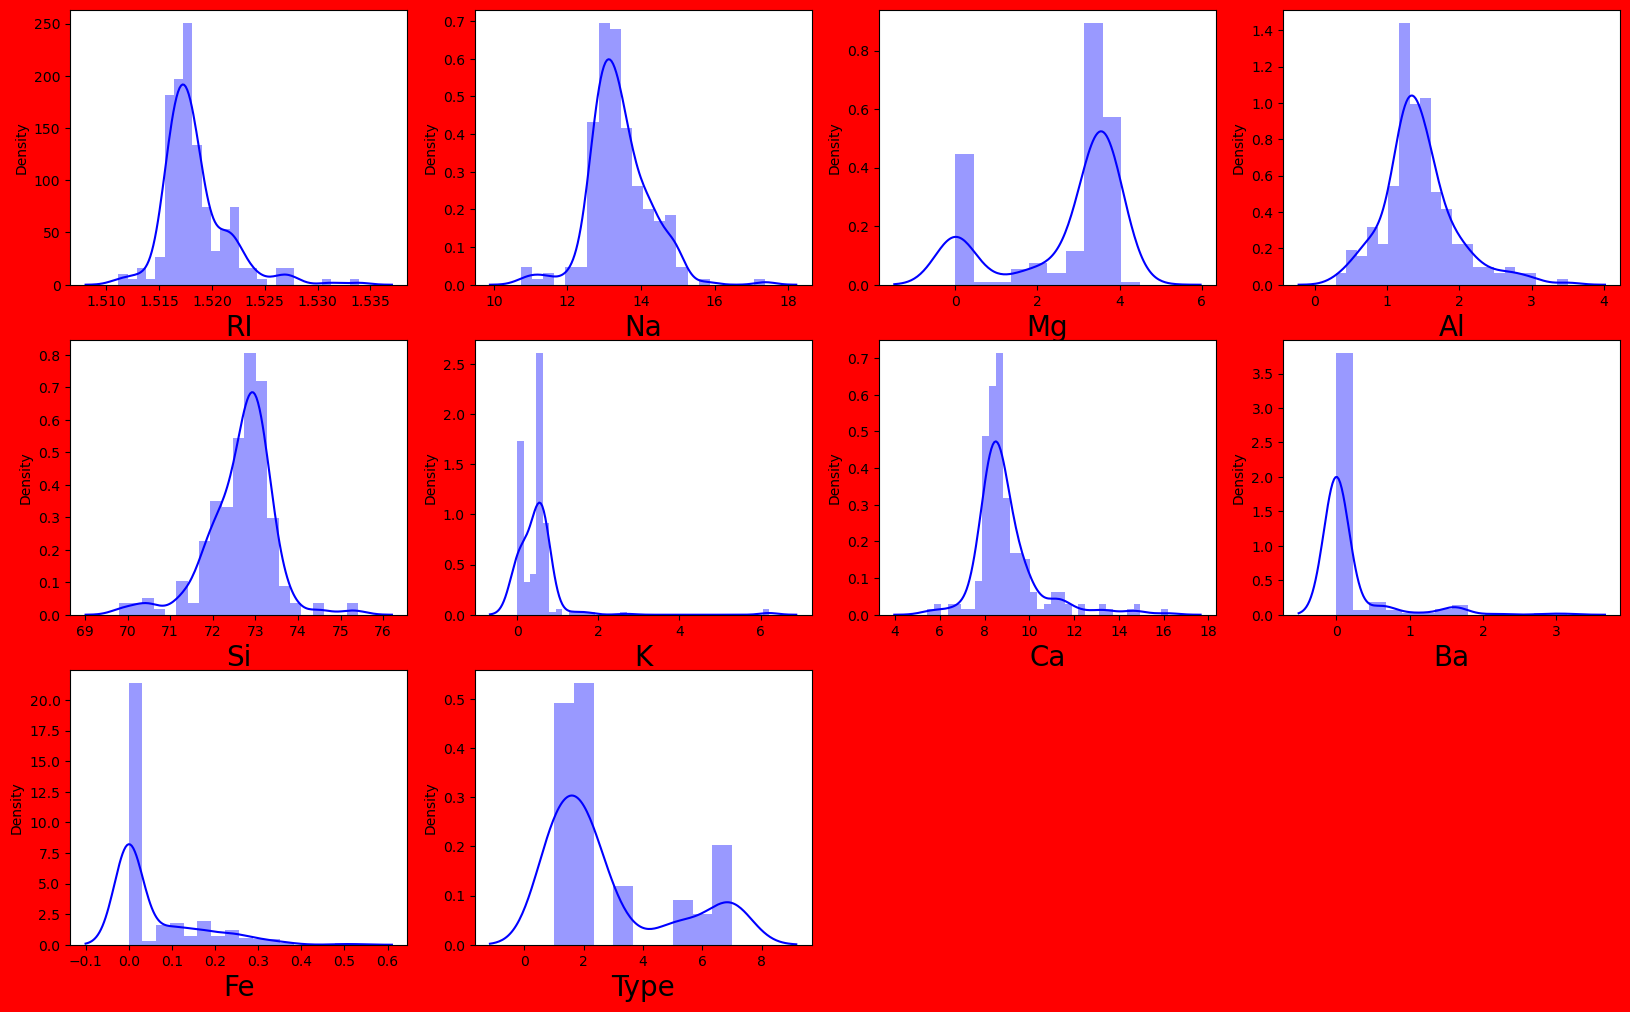

In [33]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=18:
        ax=plt.subplot(6,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

Here we are checking the skewness of the data.as you see above K,Ba,Ca,Fe,RI,have skewness here we are using squareroot method to remove the skewness.

In [34]:
df['K']=np.sqrt(df['K'])

In [35]:
df.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       0.871221
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

In [36]:
df['Ba']=np.sqrt(df['Ba'])

In [37]:
df.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       0.871221
Ca      2.047054
Ba      2.377201
Fe      1.754327
Type    1.114915
dtype: float64

In [38]:
df['Ca']=np.sqrt(df['Ca'])

In [39]:
df['Fe']=np.sqrt(df['Fe'])

In [40]:
df.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       0.871221
Ca      1.572031
Ba      2.377201
Fe      1.053218
Type    1.114915
dtype: float64

In [41]:
df['RI']=np.sqrt(df['RI'])

In [42]:
df.skew()

RI      1.619143
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       0.871221
Ca      1.572031
Ba      2.377201
Fe      1.053218
Type    1.114915
dtype: float64

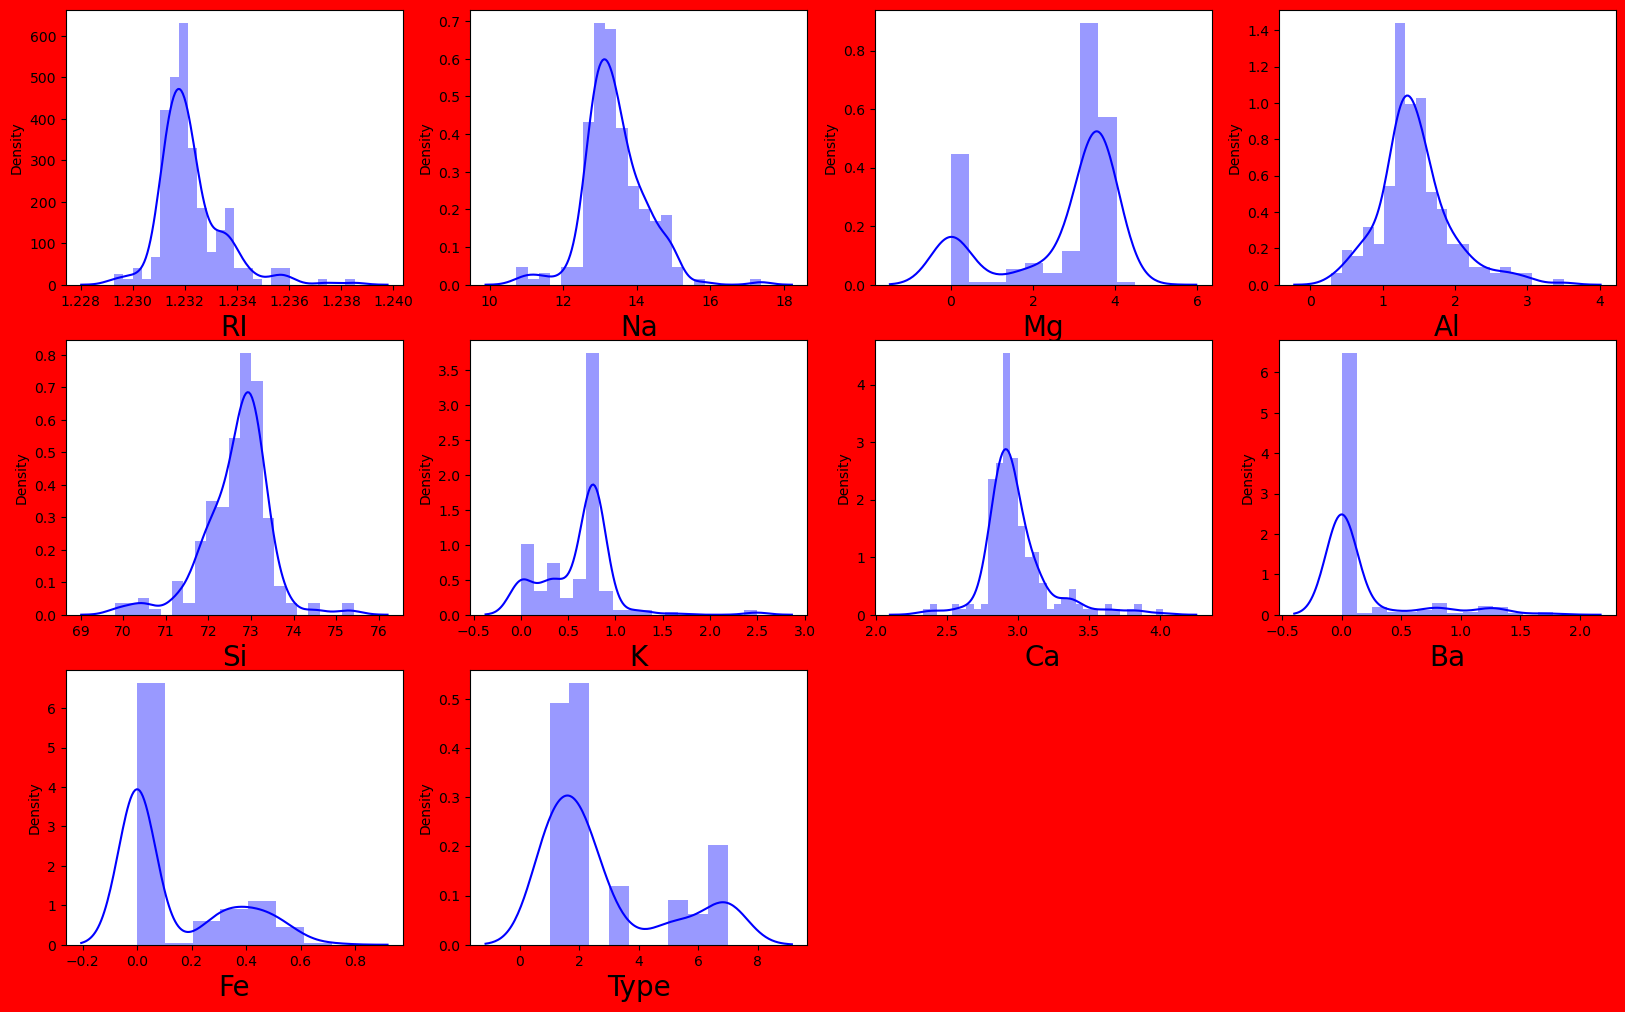

In [43]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=18:
        ax=plt.subplot(6,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

Now we can see all data are nomally distributed.

In [44]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

Checking the Correlation b/w Target variable and Independent variable.

In [45]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191829,-0.121983,-0.407522,-0.541978,-0.276352,0.805569,-0.070842,0.137100,-0.164376
Na,-0.191829,1.000000,-0.273732,0.156794,-0.069809,-0.490761,-0.267660,0.405829,-0.213496,0.502898
Mg,-0.121983,-0.273732,1.000000,-0.481799,-0.165927,0.327228,-0.429910,-0.543777,0.092300,-0.744993
Al,-0.407522,0.156794,-0.481799,1.000000,-0.005524,0.168892,-0.272391,0.549677,-0.079582,0.598829
Si,-0.541978,-0.069809,-0.165927,-0.005524,1.000000,-0.160636,-0.195603,-0.031942,-0.083684,0.151565
K,-0.276352,-0.490761,0.327228,0.168892,-0.160636,1.000000,-0.389744,-0.263170,0.080067,-0.308986
Ca,0.805569,-0.267660,-0.429910,-0.272391,-0.195603,-0.389744,1.000000,-0.145024,0.119266,-0.006390
Ba,-0.070842,0.405829,-0.543777,0.549677,-0.031942,-0.263170,-0.145024,1.000000,-0.056200,0.655216
Fe,0.137100,-0.213496,0.092300,-0.079582,-0.083684,0.080067,0.119266,-0.056200,1.000000,-0.206374
Type,-0.164376,0.502898,-0.744993,0.598829,0.151565,-0.308986,-0.006390,0.655216,-0.206374,1.000000


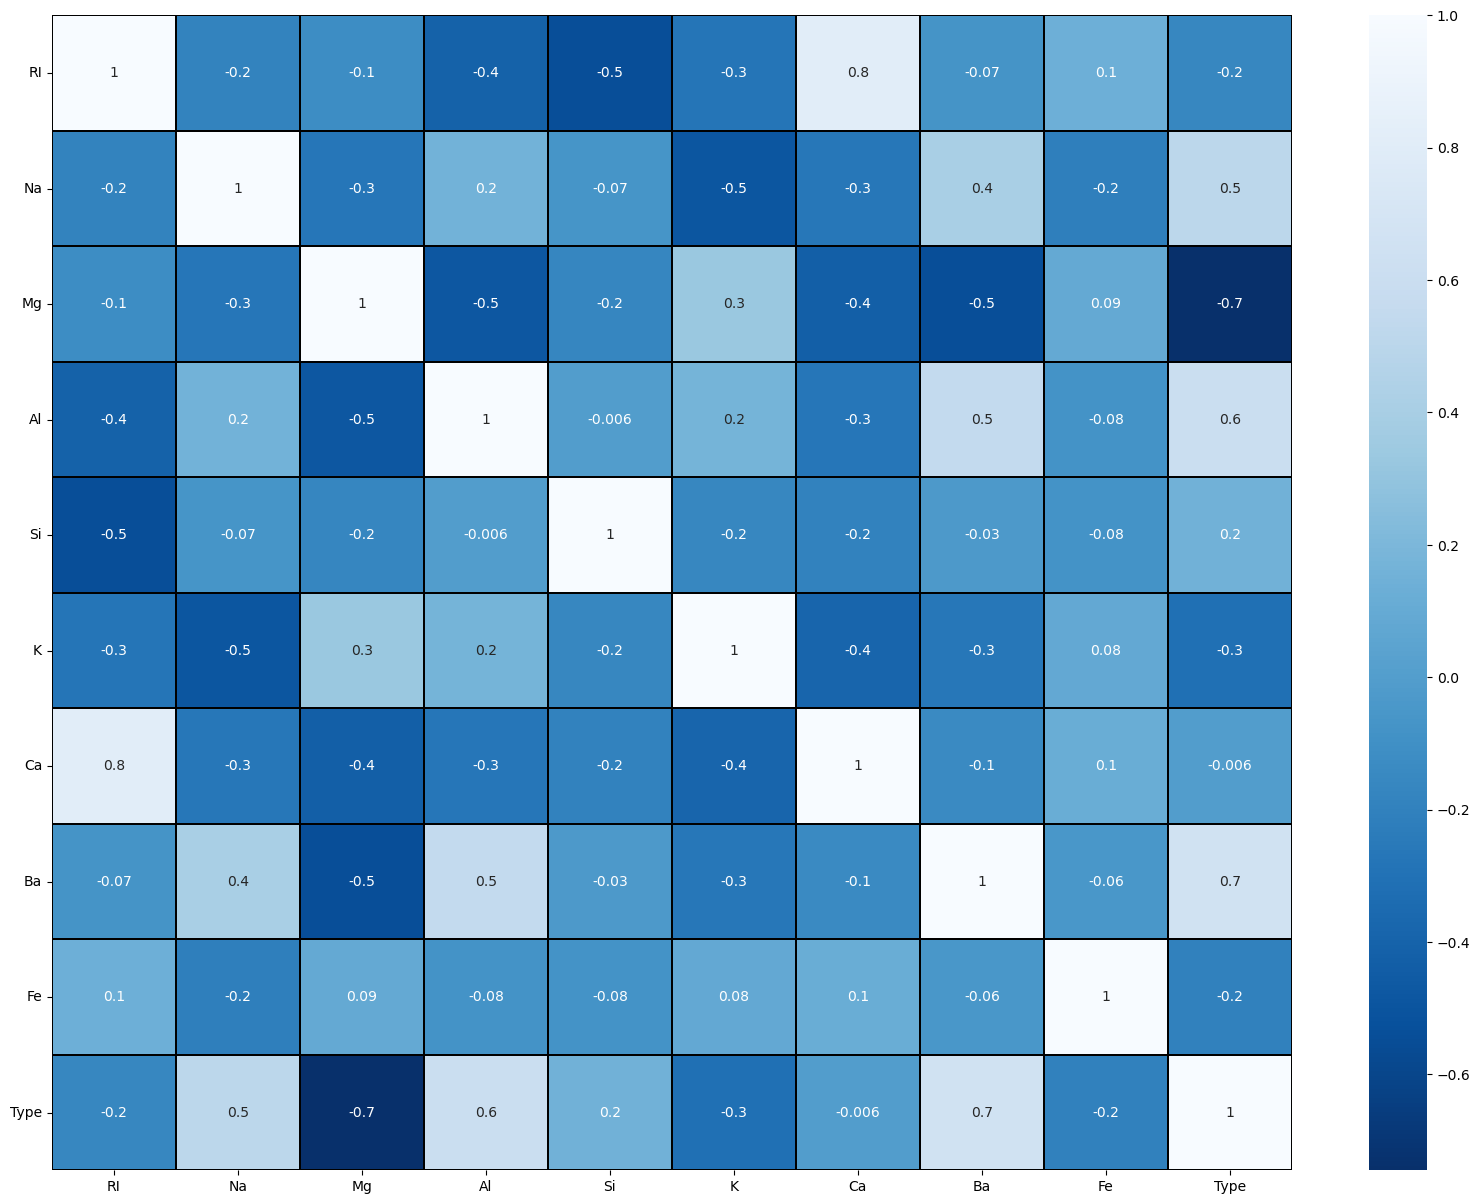

In [46]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()
                    

In [47]:
x=df.drop('Type',axis=1)

In [48]:
y=df['Type']

In [49]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

feature scaling

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)


In [51]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.873686,0.284953,1.254639,-0.692442,-1.127082,-0.992606,-0.117724,-0.417679,-0.6609
1,-0.249066,0.591817,0.636168,-0.170460,0.102319,0.243070,-0.831001,-0.417679,-0.6609
2,-0.721658,0.149933,0.601422,0.190912,0.438787,0.054574,-0.870937,-0.417679,-0.6609
3,-0.232546,-0.242853,0.698710,-0.310994,-0.052974,0.414578,-0.523778,-0.417679,-0.6609
4,-0.311845,-0.169205,0.650066,-0.411375,0.555256,0.377708,-0.641059,-0.417679,-0.6609
...,...,...,...,...,...,...,...,...,...
209,-0.705130,0.898681,-1.865511,2.881125,-0.052974,-0.888057,0.202760,2.249144,-0.6609
210,-0.500206,1.856097,-1.865511,1.094342,0.529374,-1.668419,-0.384443,2.848499,-0.6609
211,0.754865,1.168721,-1.865511,1.154570,0.995252,-1.668419,-0.353683,2.899457,-0.6609
212,-0.612578,1.193270,-1.865511,0.993960,1.241133,-1.668419,-0.322996,2.827892,-0.6609


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,8.871859,RI
1,8.628747,Na
2,15.837891,Mg
3,4.629930,Al
4,6.679183,Si
5,7.334835,K
6,24.935675,Ca
7,5.005849,Ba
8,1.085585,Fe


As we can seee there is no multicorrelation present in the dataset.

In [53]:
y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

OverSampling here we use SMOTE method.

In [54]:
import sklearn
!pip install imbalanced_learn
from imblearn.over_sampling import SMOTE
smt=SMOTE()


In [55]:
trainx,trainy=smt.fit_resample(x,y)

In [56]:
trainx.value_counts()

RI         Na         Mg         Al         Si         K          Ca         Ba         Fe       
 1.243258   0.984603   0.789048  -1.957244  -1.140023  -0.753364   0.486999  -0.417679  -0.660900    2
-2.385764   4.875637  -1.865511  -2.218235   3.570524  -1.668419  -1.810390  -0.417679  -0.660900    1
 0.163327   0.453502   0.610733  -0.282907  -1.009385  -0.225024   0.074191  -0.417679  -0.660900    1
 0.202846   0.741832  -0.223538   0.258314  -0.310864  -1.668419   0.462360  -0.417679  -0.660900    1
 0.202780   1.581671  -1.512915   0.838012  -0.086779  -1.668419   0.983221  -0.417679  -0.660900    1
                                                                                                    ..
-0.498564  -0.602889   0.609609  -0.289130  -0.042495   0.482821  -0.123880  -0.417679  -0.660900    1
-0.500206   1.856097  -1.865511   1.094342   0.529374  -1.668419  -0.384443   2.848499  -0.660900    1
-0.506816   1.414212  -1.865511   1.074265   0.827019  -1.668419  -0.292381   

In [57]:
trainy.value_counts()

1    76
2    76
3    76
5    76
6    76
7    76
Name: Type, dtype: int64

In [58]:
trainy

0      1
1      1
2      1
3      1
4      1
      ..
451    7
452    7
453    7
454    7
455    7
Name: Type, Length: 456, dtype: int64

<Axes: ylabel='count'>

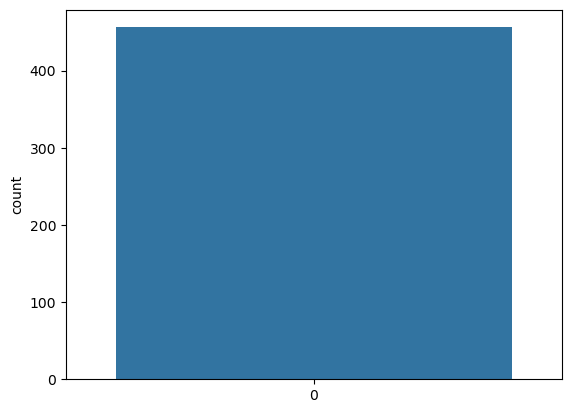

In [59]:
sns.countplot(trainy)

Model Bulding

As you can see this is Classification problem in this we have varitey of categories present in the data so we use Classification model here.

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best Accuracyscore is',maxAccu,'On random states',maxRs)

Best Accuracyscore is 0.8769230769230769 On random states 4


In [73]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.7846153846153846
[[20  3  1  0  0  0]
 [ 3 15  0  0  0  1]
 [ 2  1  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  1  0  0  2  1]
 [ 1  0  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.77      0.83      0.80        24
           2       0.75      0.79      0.77        19
           3       0.67      0.40      0.50         5
           5       1.00      1.00      1.00         3
           6       1.00      0.50      0.67         4
           7       0.82      0.90      0.86        10

    accuracy                           0.78        65
   macro avg       0.83      0.74      0.77        65
weighted avg       0.79      0.78      0.78        65



In [75]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.7384615384615385
[[19  5  0  0  0  0]
 [ 4 15  0  0  0  0]
 [ 3  2  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  1  0  0  3  0]
 [ 1  0  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.70      0.79      0.75        24
           2       0.62      0.79      0.70        19
           3       0.00      0.00      0.00         5
           5       1.00      0.67      0.80         3
           6       1.00      0.75      0.86         4
           7       1.00      0.90      0.95        10

    accuracy                           0.74        65
   macro avg       0.72      0.65      0.67        65
weighted avg       0.70      0.74      0.71        65



In [77]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))


0.7846153846153846
[[19  4  1  0  0  0]
 [ 2 16  0  0  0  1]
 [ 3  1  1  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  1  0  0  3  0]
 [ 1  0  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.76      0.79      0.78        24
           2       0.73      0.84      0.78        19
           3       0.50      0.20      0.29         5
           5       1.00      1.00      1.00         3
           6       1.00      0.75      0.86         4
           7       0.90      0.90      0.90        10

    accuracy                           0.78        65
   macro avg       0.81      0.75      0.77        65
weighted avg       0.78      0.78      0.77        65



In [129]:
ac=AdaBoostClassifier()
ac.fit(x_train,y_train)
predac=ac.predict(x_test)
print(accuracy_score(y_test,predac))
print(confusion_matrix(y_test,predac))
print(classification_report(y_test,predac))


0.4461538461538462
[[19  5  0  0  0  0]
 [14  4  0  1  0  0]
 [ 4  1  0  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  4  0  0  0  0]
 [ 0  7  0  0  0  3]]
              precision    recall  f1-score   support

           1       0.51      0.79      0.62        24
           2       0.19      0.21      0.20        19
           3       0.00      0.00      0.00         5
           5       0.75      1.00      0.86         3
           6       0.00      0.00      0.00         4
           7       1.00      0.30      0.46        10

    accuracy                           0.45        65
   macro avg       0.41      0.38      0.36        65
weighted avg       0.43      0.45      0.40        65



In [130]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))


0.7692307692307693
[[21  3  0  0  0  0]
 [ 4 14  1  0  0  0]
 [ 4  0  1  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  3  1]
 [ 1  1  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.70      0.88      0.78        24
           2       0.78      0.74      0.76        19
           3       0.50      0.20      0.29         5
           5       1.00      1.00      1.00         3
           6       1.00      0.75      0.86         4
           7       0.89      0.80      0.84        10

    accuracy                           0.77        65
   macro avg       0.81      0.73      0.75        65
weighted avg       0.77      0.77      0.76        65



In [131]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
predet=et.predict(x_test)
print(accuracy_score(y_test,predet))
print(confusion_matrix(y_test,predet))
print(classification_report(y_test,predet))


0.7692307692307693
[[20  3  1  0  0  0]
 [ 5 14  0  0  0  0]
 [ 3  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  1  0  0  3  0]
 [ 1  0  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.69      0.83      0.75        24
           2       0.74      0.74      0.74        19
           3       0.67      0.40      0.50         5
           5       1.00      0.67      0.80         3
           6       1.00      0.75      0.86         4
           7       1.00      0.90      0.95        10

    accuracy                           0.77        65
   macro avg       0.85      0.71      0.77        65
weighted avg       0.78      0.77      0.77        65



Now we can check cross valdiation of all the model.

In [132]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predRFC)-score.mean())

[0.72093023 0.74418605 0.65116279 0.55813953 0.76190476]
0.687264673311185
difference b/w Accuracy_score and cross_val_score is: 0.09735071130419959


In [133]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predsvc)-score.mean())

[0.58139535 0.72093023 0.55813953 0.76744186 0.66666667]
0.6589147286821706
difference b/w Accuracy_score and cross_val_score is: 0.0795468097793679


In [134]:
score=cross_val_score(gb,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predgb)-score.mean())

[0.6744186  0.72093023 0.60465116 0.58139535 0.71428571]
0.6591362126245847
difference b/w Accuracy_score and cross_val_score is: 0.12547917199079994


In [135]:
score=cross_val_score(ac,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predac)-score.mean())

[0.41860465 0.30232558 0.39534884 0.18604651 0.4047619 ]
0.3414174972314507
difference b/w Accuracy_score and cross_val_score is: 0.10473634892239547


In [136]:
score=cross_val_score(bc,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predbc)-score.mean())

[0.58139535 0.60465116 0.72093023 0.55813953 0.71428571]
0.6358803986710964
difference b/w Accuracy_score and cross_val_score is: 0.13335037055967291


In [137]:
score=cross_val_score(et,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predet)-score.mean())

[0.62790698 0.76744186 0.55813953 0.65116279 0.69047619]
0.6590254706533777
difference b/w Accuracy_score and cross_val_score is: 0.11020529857739159


As we can see above all model Accuracy_score and crossval_score is less and score mean is 68% in RandomForestClassifier model so this is the best model.

Hyper parameter tunning

In [154]:
from sklearn.model_selection import GridSearchCV
param={'criterion':['gini', 'entropy', 'log_loss']}
gscv=GridSearchCV(RandomForestClassifier(),param,cv=5)
gscv.fit(x_train,y_train)
gscv.best_params_

{'criterion': 'log_loss'}

In [156]:
model1=RandomForestClassifier(criterion='log_loss')
model1.fit(x_train,y_train)
pred=model1.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

73.84615384615385


In [170]:
model2=RandomForestClassifier(criterion='entropy')
model2.fit(x_train,y_train)
pred=model2.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

78.46153846153847


In [158]:
fmodel=RandomForestClassifier(criterion='gini')
fmodel.fit(x_train,y_train)
pred=fmodel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

78.46153846153847


Plotting Roc and AUC curve

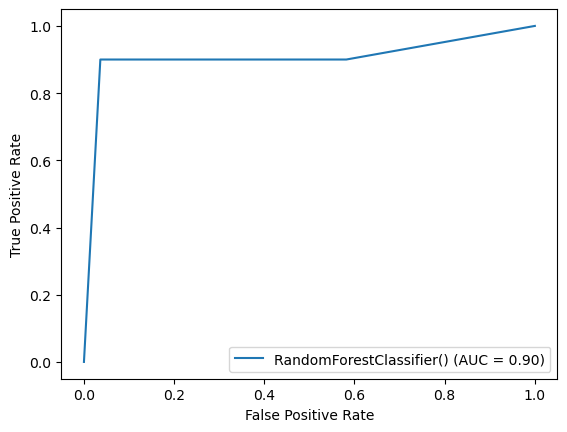

In [179]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(y_test,pred,pos_label=7)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=fmodel)
display.plot()

As we can see Auc value is 0.90 near to 1 means it gives more accuracy. 

Saving the Model

In [173]:
import joblib
model=joblib.dump(fmodel,'glasstype.pkl')

In [174]:
model=joblib.load('glasstype.pkl')
prediction=model.predict(x_test)
prediction

array([1, 1, 2, 1, 7, 1, 1, 1, 7, 6, 1, 1, 2, 5, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 3, 1, 1, 3, 5, 2, 1, 2, 1, 2, 7, 1, 1, 2, 7, 3, 2, 1, 7, 6,
       2, 7, 1, 7, 2, 5, 2, 2, 2, 2, 7, 7, 2, 1, 7, 1, 7, 1, 2, 1, 1],
      dtype=int64)

Conclusion

In [175]:
a=np.array(y_test)
df=pd.DataFrame()
df['prediction']=prediction
df['original']=a
df

,prediction,original
0,1,1
1,1,1
2,2,1
3,1,2
4,7,2
...,...,...
60,7,7
61,1,1
62,2,2
63,1,1
